In [1]:
import os
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)


%matplotlib inline

In [2]:
#Datos


Total_time = 250 #4.1666666 min * 60 sec/min
data_per_sec = 32000 / 250 # 128
Time_inicio = 10
slides_inicio = Time_inicio * data_per_sec
slides_inicio

ventana_estabilidad = 640 # 5seg
ventana_total = 30000


In [3]:
def import_raw_data():
    
    col = ['AF3', 'F3', 'T7', 'O1', 'P8', 'FC6', 'F8']
    
    dataset = []
    
    for filename in os.listdir("./data"):
        data = pandas.read_csv("./data/"+filename)
        dataset.append(data[col].loc[slides_inicio:slides_inicio + ventana_total - 1,:])
        
    return dataset

In [4]:
data = import_raw_data()

In [9]:
def feature_extraction(dataset):
    users = len(dataset)
    
    col = ['AF3', 'F3', 'O1', 'P8', 'FC6', 'F8']
    i_pos = 13000
    i_neg = 27000
    
    means_pos = [data[i_pos:i_pos+ventana_estabilidad].mean() for data in dataset]
    df_pos = pandas.concat(means_pos,axis=1)
    df_pos.columns=[i for i in range(users)]
    means_neg = [data[i_neg:i_neg+ventana_estabilidad].mean() for data in dataset]
    df_neg = pandas.concat(means_neg,axis=1)
    df_neg.columns=[i + 20 for i in range(users)]
    new_df = pandas.concat([df_pos.transpose(),df_neg.transpose()])
    return new_df

def feature_extraction_std(dataset):
    users = len(dataset)
    
    col = ['AF3', 'F3', 'O1', 'P8', 'FC6', 'F8'] #
    i_pos = 13000
    i_neg = 27000
    
    means_pos = [data[i_pos:i_pos+ventana_estabilidad].std() for data in dataset]
    df_pos = pandas.concat(means_pos,axis=1)
    df_pos.columns=[i for i in range(users)]
    means_neg = [data[i_neg:i_neg+ventana_estabilidad].std() for data in dataset]
    df_neg = pandas.concat(means_neg,axis=1)
    df_neg.columns=[i + 20 for i in range(users)]
    new_df = pandas.concat([df_pos.transpose(),df_neg.transpose()])
    return new_df
    
    
    
    
    

In [10]:
dfm = feature_extraction(data)
dfs = feature_extraction_std(data)

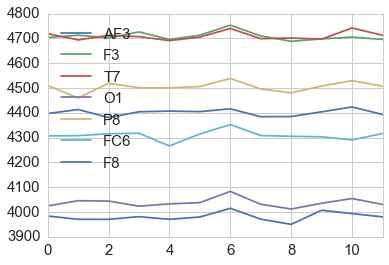

In [11]:
plt.figure(figsize=(20,20))
dfm[0:12].plot()

plt.legend(loc='upper left')


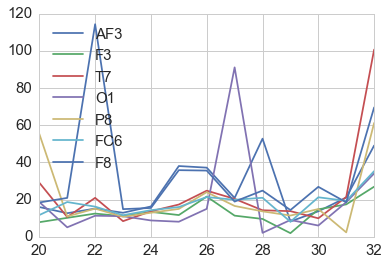

In [13]:
plt.figure(figsize=(20,20))
dfs[13:].plot()

plt.legend(loc='upper left')

In [9]:
df.shape

(26, 7)

AF3
F3
T7
O1
P8
FC6
F8


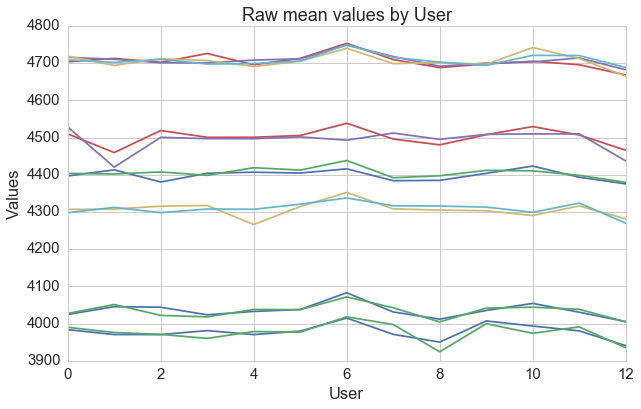

In [16]:
plt.figure(figsize=(10,6))
X =[i for i in range(13)]
for d in dfm:
    print(d)
    plt.plot(X,dfm[d][:13])
    plt.plot(X,dfm[d][13:])
        
plt.xlabel("User")
plt.ylabel("Values")
plt.title("Raw mean values by User")
#plt.legend(loc = [10,10])
plt.show()

In [17]:
dfm.to_csv("dfm.csv")
dfs.to_csv("dfs.csv")

In [11]:
target = []
for i in range(40):
    if i < 13:
        target.append(1.0)
    else:
        target.append(0.0)

In [12]:
target

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [13]:
df["target"] = pandas.Series(target)

In [14]:
df

,AF3,F3,T7,O1,P8,FC6,F8,target
0,3983.828125,4703.718750,4719.014063,4024.565625,4510.104688,4306.975000,4396.987500,1.0
1,3970.570312,4712.901563,4693.957812,4045.498437,4459.789062,4307.828125,4413.275000,1.0
2,3970.431250,4702.204687,4712.040625,4043.990625,4519.025000,4315.637500,4380.662500,1.0
3,3981.223437,4726.078125,4707.092188,4023.665625,4500.757812,4317.460938,4404.123438,1.0
4,3970.387500,4695.731250,4691.201563,4032.729688,4500.882812,4266.378125,4406.951563,1.0
5,3979.781250,4713.057813,4705.417188,4037.845313,4505.695312,4314.590625,4404.729688,1.0
6,4014.939063,4753.312500,4740.120313,4082.998437,4538.557813,4352.548437,4416.012500,1.0
7,3971.157813,4709.754687,4698.867188,4031.262500,4496.056250,4308.390625,4384.235937,1.0
8,3950.201562,4688.251562,4701.603125,4012.006250,4480.487500,4305.168750,4384.987500,1.0
9,4007.095313,4697.984375,4697.073438,4035.292188,4507.782812,4303.312500,4403.931250,1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm



In [16]:
#clf = RandomForestClassifier() 
clf = svm.SVC(kernel = 'rbf', C= 1000)

In [17]:

clf.fit(df.iloc[:,0:-1],df["target"])

prediction = clf.predict(df.iloc[:,0:-1])

#accuracy = accuracy_score(df.iloc[:,0:-1],df["target"])
#print("Support Vector Machines accuracy: ", SVC_accuracy )


In [18]:
accuracy = accuracy_score(prediction,df["target"])

In [19]:
accuracy

1.0

<h1>cross validation</h1>

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df["target"],
                                                    test_size=0.2, random_state=0)

In [22]:
X_train.shape

(20, 7)

In [23]:
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)
accuracy_score(prediction,y_test)

0.5

In [24]:


from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=2)
scores.mean()*100                                            



35.0

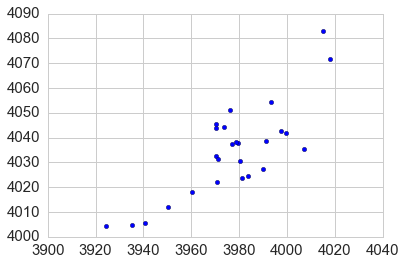

In [21]:
#pos = dfm[]
dfm.corr

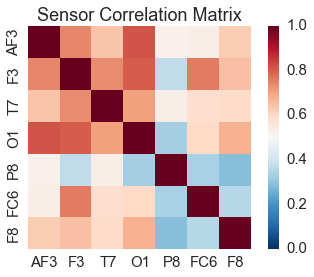

In [30]:
corr = dfm.corr()

plt.title("Sensor Correlation Matrix")
sns.heatmap(corr, vmin=0, vmax=1, square=True, cmap="RdBu_r")
plt.savefig('./pngs/sensorcorrelationmatrix.png', dpi=180)

In [31]:
dfm.corr()

,AF3,F3,T7,O1,P8,FC6,F8
AF3,1.000000,0.745355,0.641911,0.812990,0.523577,0.533585,0.627816
F3,0.745355,1.000000,0.736445,0.802981,0.371598,0.759507,0.649079
T7,0.641911,0.736445,1.000000,0.706071,0.533366,0.584834,0.596182
O1,0.812990,0.802981,0.706071,1.000000,0.328533,0.598425,0.676137
P8,0.523577,0.371598,0.533366,0.328533,1.000000,0.338332,0.287177
FC6,0.533585,0.759507,0.584834,0.598425,0.338332,1.000000,0.358209
F8,0.627816,0.649079,0.596182,0.676137,0.287177,0.358209,1.000000
